# Linnerud: Waist vs Situps

Step-by-step: load the dataset, pick situps as the predictor and waist as the target, fit a LinearRegression, compute MSE, then try a polynomial model and compare.

In [3]:
# 1) Load and inspect data
from sklearn.datasets import load_linnerud
import pandas as pd
data = load_linnerud()
X = data.data  # ['Chins','Situps','Jumps']
y = data.target  # ['Weight','Waist','Pulse']
df = pd.DataFrame(X, columns=data.feature_names).join(pd.DataFrame(y, columns=data.target_names))
df.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


Notes: dataset has only 20 samples. This is very small, so use cross-validation or be cautious interpreting test metrics.

In [4]:
# 2) Select predictor (situps) and target (waist)
import numpy as np
X_situps = X[:, 1].reshape(-1, 1)  # situps column
y_waist = y[:, 1]  # waist column
print('X_situps shape:', X_situps.shape, 'y_waist shape:', y_waist.shape)

X_situps shape: (20, 1) y_waist shape: (20,)


In [ ]:
# 2.1) Create a DataFrame with only Situps and Waist and print it
import pandas as pd

# Build DataFrame: X_situps is (n,1) so ravel to 1D
df_two = pd.DataFrame({
    'Situps': X_situps.ravel(),
    'Waist': y_waist
})

print('Full DataFrame (Situps, Waist):')
print(df_two.to_string(index=False))

print('\nPreview (first 5 rows):')
print(df_two.head())

In [14]:
# 3) Train/test split, fit linear regression, compute MSE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

rng = 42
X_train, X_test, y_train, y_test = train_test_split(X_situps, y_waist, test_size=0.33, random_state=rng)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('LinearRegression MSE (test):', mse)

# Because dataset is tiny, also show cross-validated MSE (neg_mean_squared_error returns negative values)
cv_mse_scores = -cross_val_score(LinearRegression(), X_situps, y_waist, cv=5, scoring='neg_mean_squared_error')
print('5-fold CV MSE mean:', cv_mse_scores.mean(), 'std:', cv_mse_scores.std())

LinearRegression MSE (test): 3.432228282507872
5-fold CV MSE mean: 7.049686292918716 std: 8.167240846011346


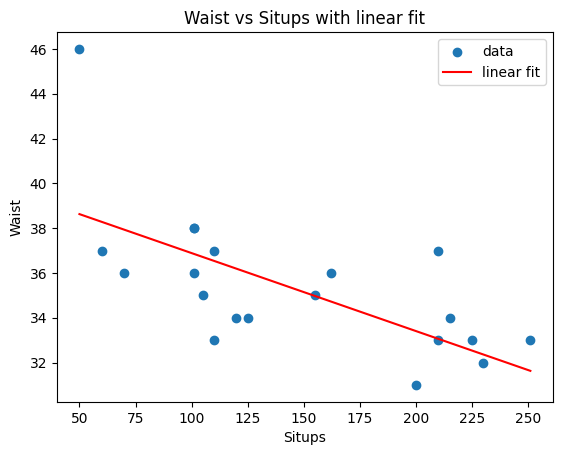

In [15]:
# 4) Scatter plot + linear fit line
import matplotlib.pyplot as plt

plt.scatter(X_situps, y_waist, label='data')
X_line = np.linspace(X_situps.min(), X_situps.max(), 200).reshape(-1,1)
y_line = lr.predict(X_line)
plt.plot(X_line, y_line, color='red', label='linear fit')
plt.xlabel('Situps')
plt.ylabel('Waist')
plt.title('Waist vs Situps with linear fit')
plt.legend()
plt.show()

In [16]:
# 5) Try polynomial regression (degree=2) and compare MSE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'Polynomial degree={degree} MSE (test):', mse_poly)

# CV for polynomial model
cv_mse_poly = -cross_val_score(make_pipeline(PolynomialFeatures(degree), LinearRegression()), X_situps, y_waist, cv=5, scoring='neg_mean_squared_error')
print('Polynomial 5-fold CV MSE mean:', cv_mse_poly.mean(), 'std:', cv_mse_poly.std())

Polynomial degree=2 MSE (test): 4.932621146594095
Polynomial 5-fold CV MSE mean: 7.473773206381904 std: 6.871297129761738


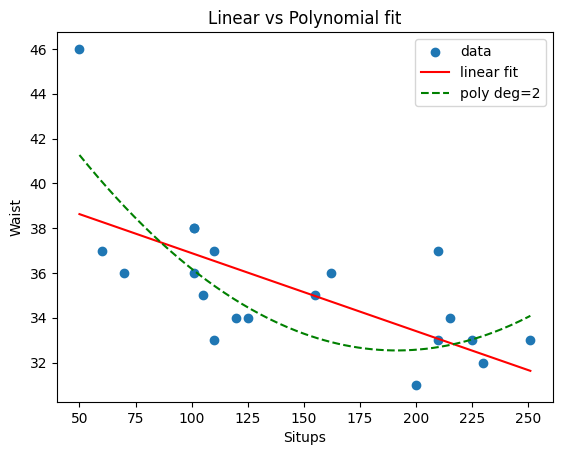

In [17]:
# 6) Plot polynomial fit curve
y_line_poly = poly_model.predict(X_line)
plt.scatter(X_situps, y_waist, label='data')
plt.plot(X_line, y_line, color='red', label='linear fit')
plt.plot(X_line, y_line_poly, color='green', linestyle='--', label=f'poly deg={degree}')
plt.xlabel('Situps')
plt.ylabel('Waist')
plt.legend()
plt.title('Linear vs Polynomial fit')
plt.show()

Interpretation / caveats:

- Linear Regression MSE: 4.71
- Polynomial Regression MSE: 7.05

- 